## Problem 0: Autopilot Implementation
### Low level control
Implement the `update(...)` functions in 
* `pd_control_with_rate.py`
* `pi_control.py`
* `tf_control.py` - Use the control discussed in class and not in the book

Tips / Instructions:
* Make sure that you saturate the return value to be limited based upon `self.limit`
* Note that `self.integrator` is the integral of the error and `self.error_delay_1` is the error on the previous loop through. Use the trapazoidal rule.
* `y_delay_1` is the value of `y` at the previous step
* `u_delay_1` is the value of `u` at the previous step

### Autopilot
To implement the autopilot, calculate the gains in `control_parameters.py` and then in `autopilot.py` implement the following.
* `__init__(...)`: 
  * Use values from `control_parameters.py` (imported as `AP`) to initialize controllers for the sequential control loops in Chapter 6.1.
  * The controllers should be instances of `TFControl`, `PIControl`, and `PDControlWithRate`
* `update(...)`: Calculate the autopilot commands for $\delta_e$, $\delta_a$, $\delta_r$, and $\delta_t$ using successive loop closure

Tips / Instructions:
* `__init__(...)`
  * Limit the output of calculated roll from aileron to be between -45 an 45 degrees
  * Limit the output of calculated course angle from roll to be between -30 and 30 degrees
  * Limit the output of calculated pitch from elevevator to be between -45 and 45 degrees
  * Limit the output of calculated altitude from pitch to be between -30 and 30 degrees
  * Limit the output of the airspeed from throttle to be between -1 and 1
* `update(...)`
  * Saturate the commanded $\phi^c$ value between -30 degrees and 30 degrees before using it in the control loop
  * Saturate the commanded altitude to be within plus or minus Ap.altitude_zone of the current altitude
  * Do not allow negative thrust

Use of feedforward control:

You'll notice that the `MsgAutopilot` has a member called `phi_feedforward`. This feedforward term should be used when calculating $\phi^c$. The final equation in section 6.1.1.2 of the book has the equation
$$
\phi^c(t) = k_{p_\chi}\bigl(\chi^c(t) - \chi(t)\bigr) + k_{i_\chi} \int_{-\infty}^t\bigl(\chi^c(\tau) - \chi(\tau)\bigr)d\tau
$$
Implement it instead as
$$
\phi^c(t) = \phi_{ff} + k_{p_\chi}\bigl(\chi^c(t) - \chi(t)\bigr) + k_{i_\chi} \int_{-\infty}^t\bigl(\chi^c(\tau) - \chi(\tau)\bigr)d\tau
$$
where $\phi_{ff} = $ `cmd.phi_feedforward`

In [1]:
# Note that this cell can be run separately to initialize for other cell blocks
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap6.run_sim import run_sim
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.tools.signals import Signals
from mav_sim.chap2.mav_viewer import MavViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view
import mav_sim.parameters.aerosonde_parameters as MAV

# The viewers need to be initialized once due to restart issues with qtgraph
if 'mav_view' not in globals():
    print("Initializing mav_view")
    global mav_view
    mav_view = MavViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

# Initialize state values
sim_params = MsgSimParams(end_time=40., video_name="chap6.avi") # Sim ending in 10 seconds
state = DynamicState()

# Define nominal commands
Va_command_nom = Signals(dc_offset=MAV.Va0,
                        amplitude=0.0,
                        start_time=1000.0,
                        frequency=0.01)
altitude_command_nom = Signals(dc_offset=-MAV.down0,
                        amplitude=0.0,
                        start_time=1000.0,
                        frequency=0.02)
course_command_nom = Signals(dc_offset=MAV.psi0,
                        amplitude=0.,
                        start_time=1000.0,
                        frequency=0.015)

# Function for running simulation and displaying results
def run_sim_and_display(Va_command: Signals = Va_command_nom, altitude_command: Signals = altitude_command_nom, \
        course_command: Signals = course_command_nom):
    global mav_view
    global data_view
    data_view.reset(sim_params.start_time)
    (mav_view, data_view) = run_sim(sim=sim_params, init_state=state, mav_view=mav_view, data_view=data_view, \
        Va_command=Va_command, altitude_command=altitude_command, course_command=course_command) 
    display_data_view(data_view)
    display_mav_view(mav_view)


Initializing mav_view
Initializing data_view


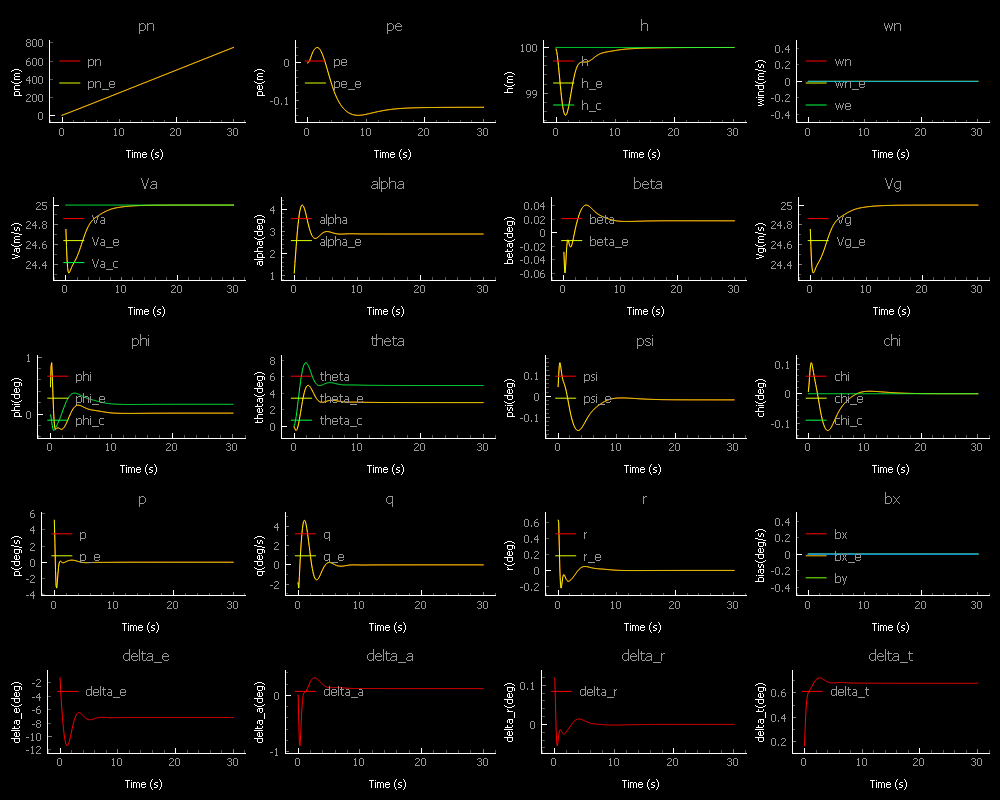

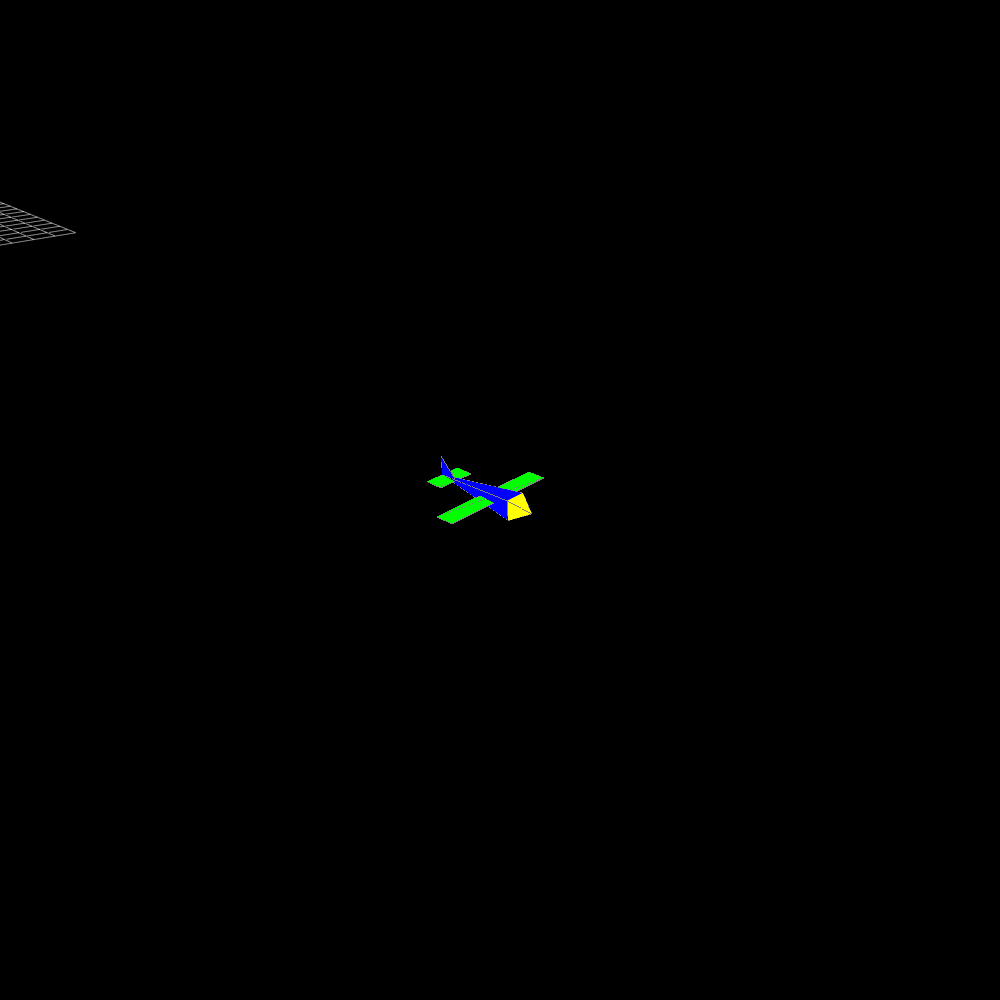

In [2]:
# Run a straight controlled trajectory
run_sim_and_display()

## Problem 1: Airspeed command - part a
Command the aircraft airspeed to oscillate between 32 and 38 every ten seconds with a starting time of 10.0.

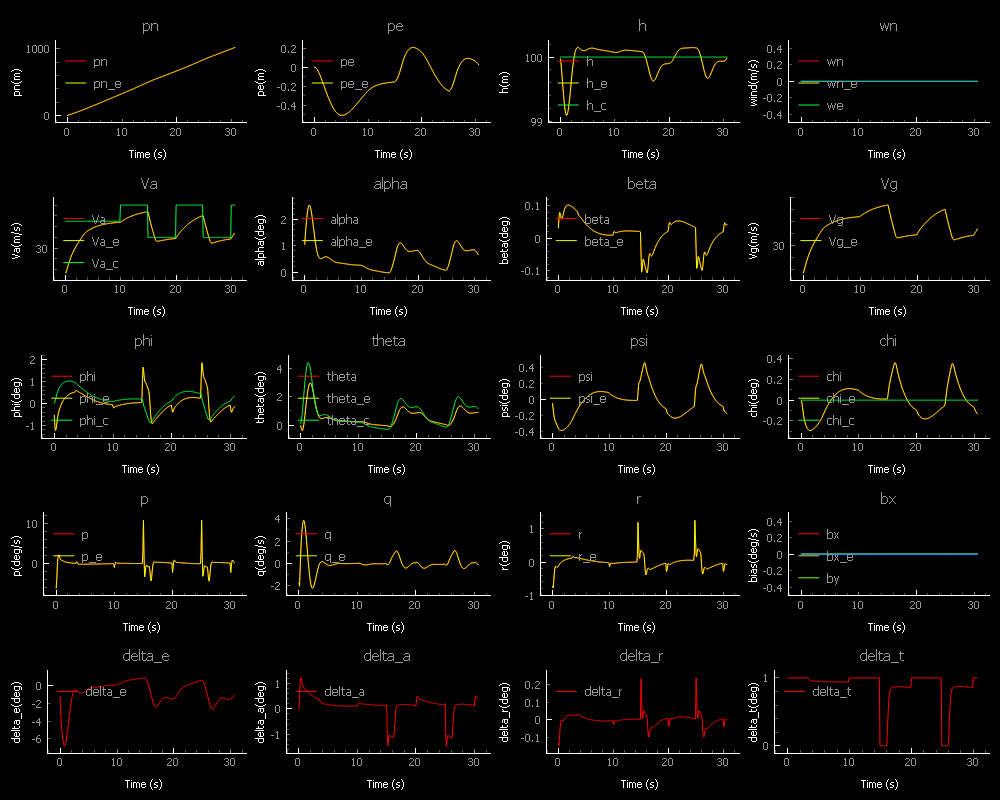

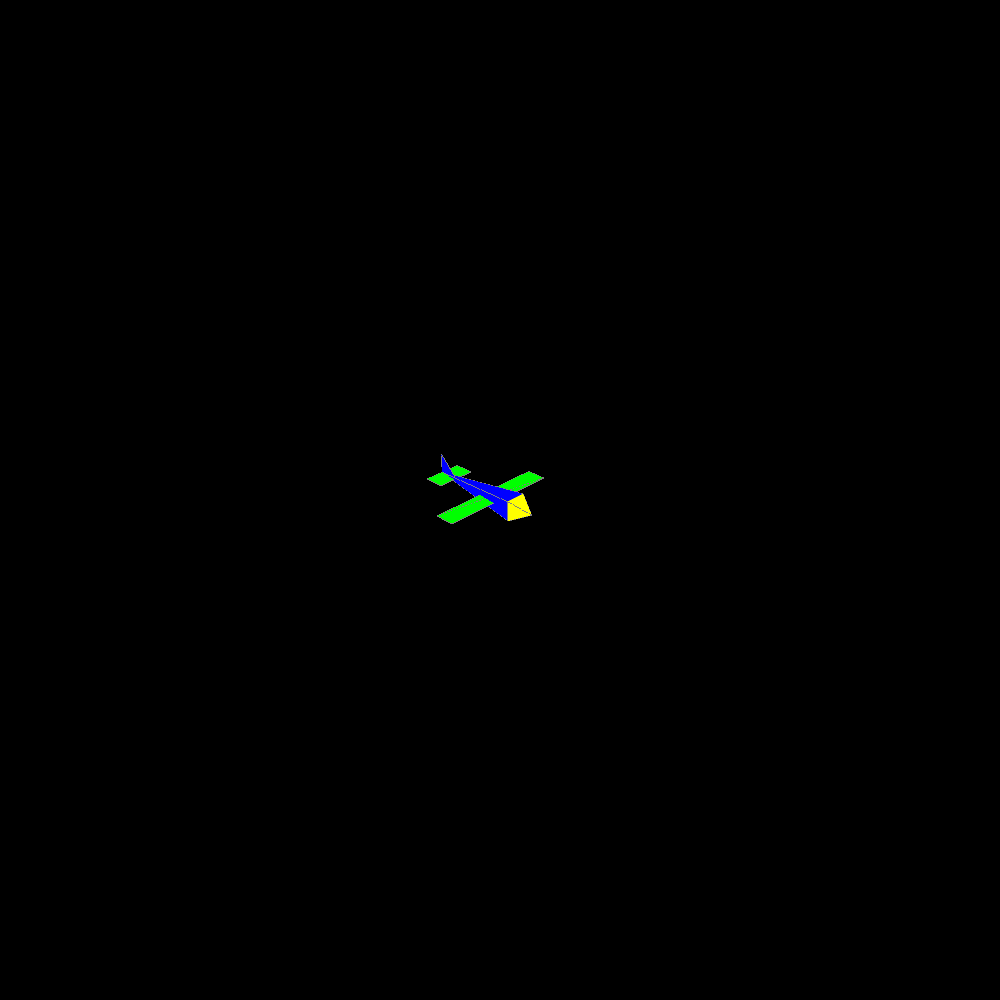

In [5]:
# Create the signal
Va_command = Signals(dc_offset=35.0,
                        amplitude=3.0,
                        start_time=10.0,
                        frequency=0.1)

# Run the simulation
run_sim_and_display(Va_command=Va_command)

## Problem 2: Airspeed command - part b
Command the aircraft airspeed to oscillate between 20 and 26 every ten seconds with a starting time of 10.0.

### Question What difference do you notice in the results? Describe the reason behind the major difference.
Answer: 
The aircraft seems to be flying slower. And the corrections made by the aircraft seem to be larger and more noticable. This could be due to the lower airspeed and larger inputs to the control surfaces are required at lower speeds to get the same output. 

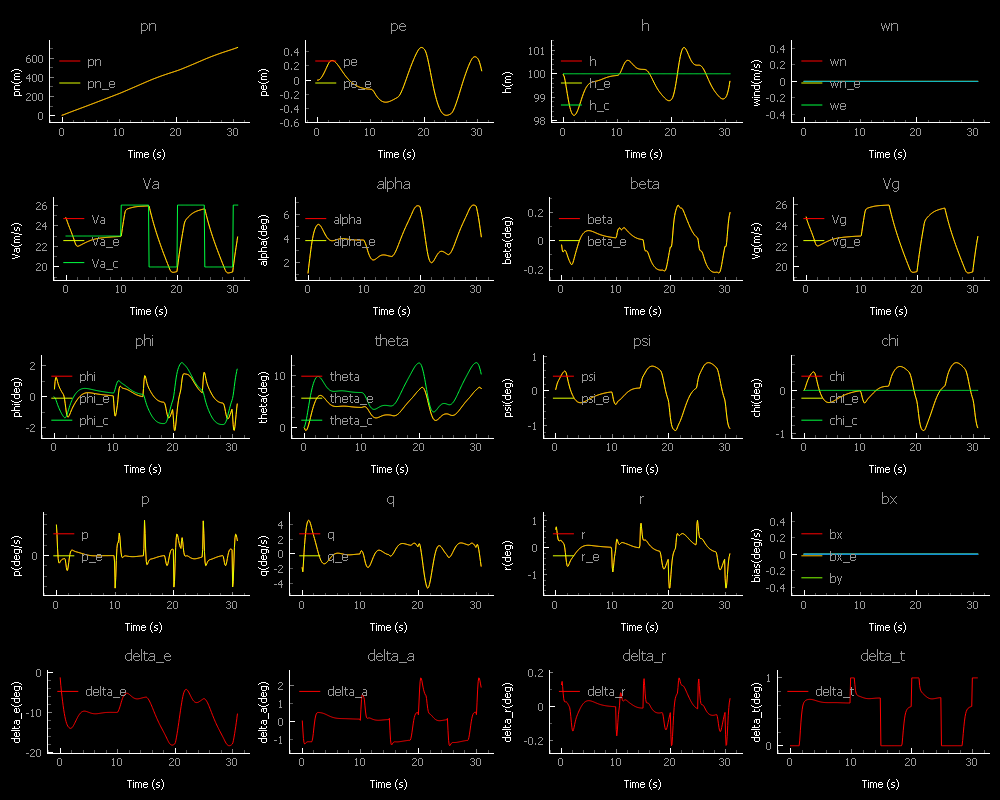

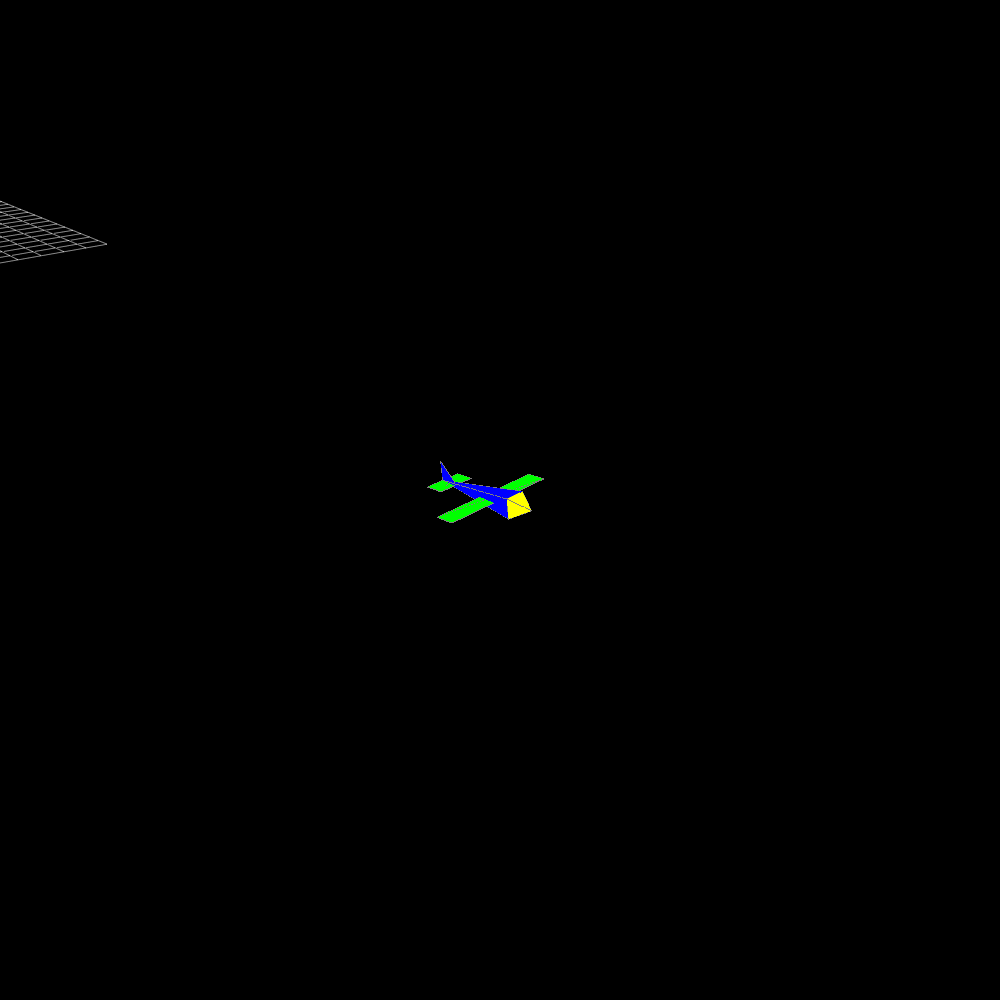

In [6]:
# Create the signal
Va_command = Signals(dc_offset=23.0,
                        amplitude=3.0,
                        start_time=10.0,
                        frequency=0.1)

# Run the simulation
run_sim_and_display(Va_command=Va_command)

## Problem 3: Altitude
Command the aircraft altitude to oscillate between 80 and 100 every 20 seconds starting at time 10.0.

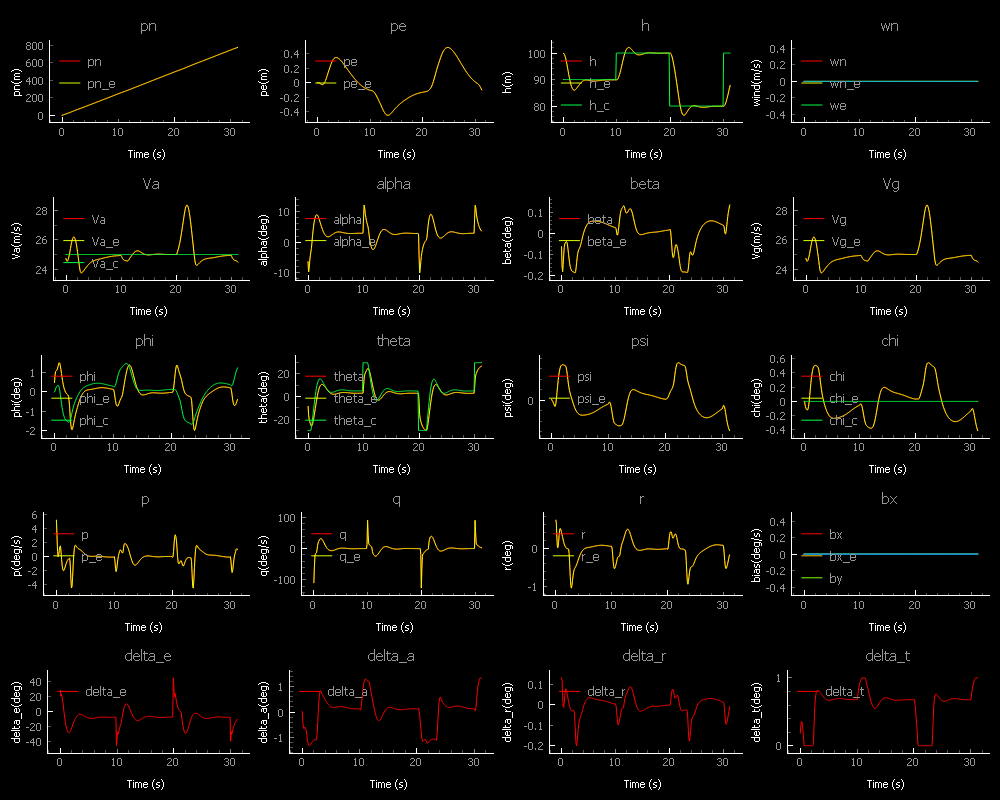

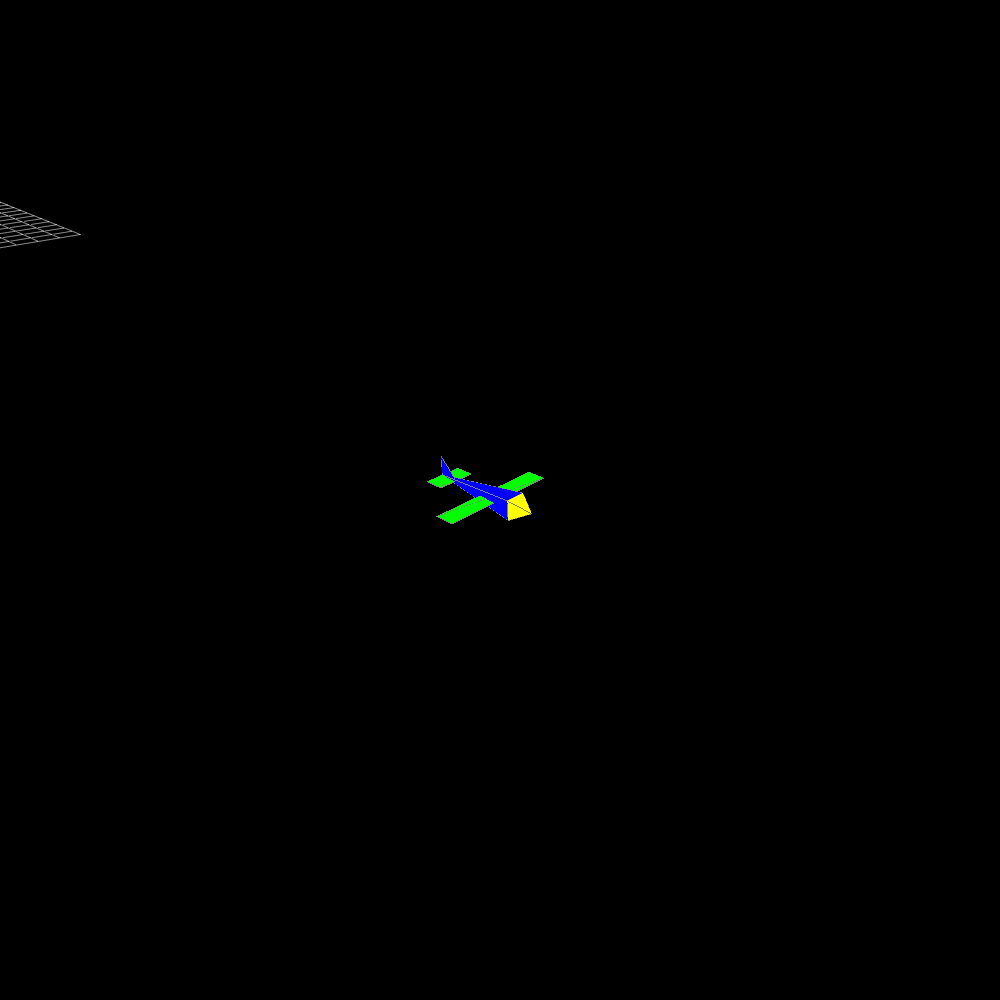

In [8]:
# Create the signal
altitude_command = Signals(dc_offset=90,
                        amplitude=10,
                        start_time=10.0,
                        frequency=0.05)

# Run the simulation
run_sim_and_display(altitude_command=altitude_command)

## Problem 4: Course
Command the aircraft course to move between 60 degrees and 80 degrees every 10 seconds starting at time 10.0.

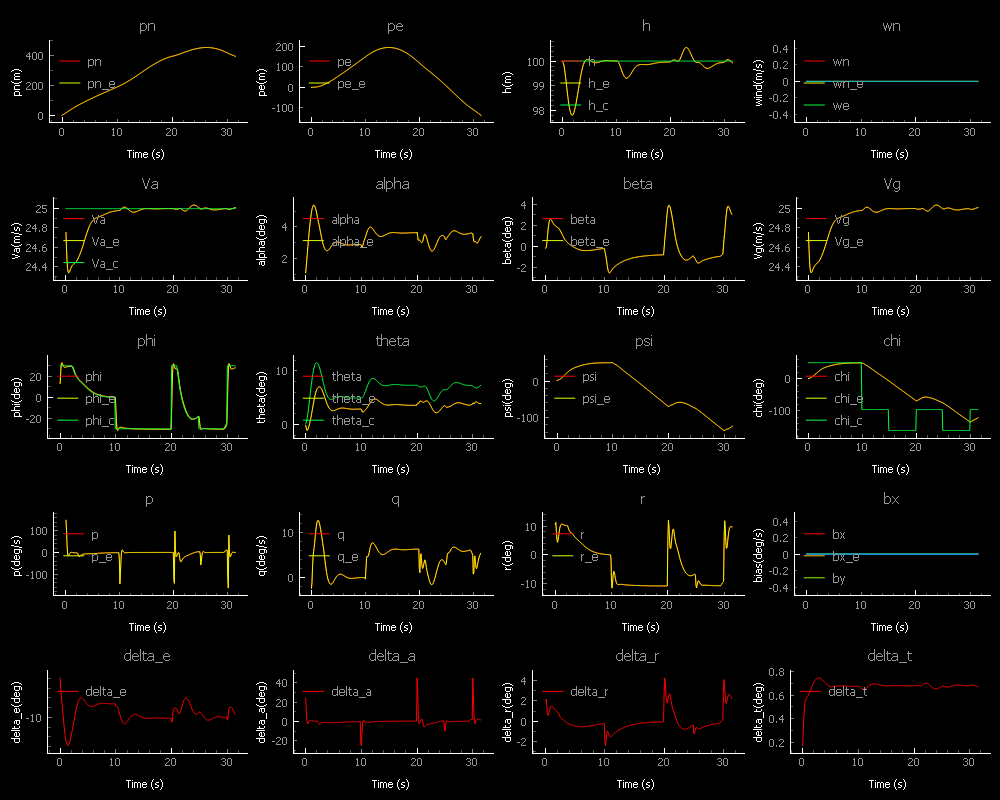

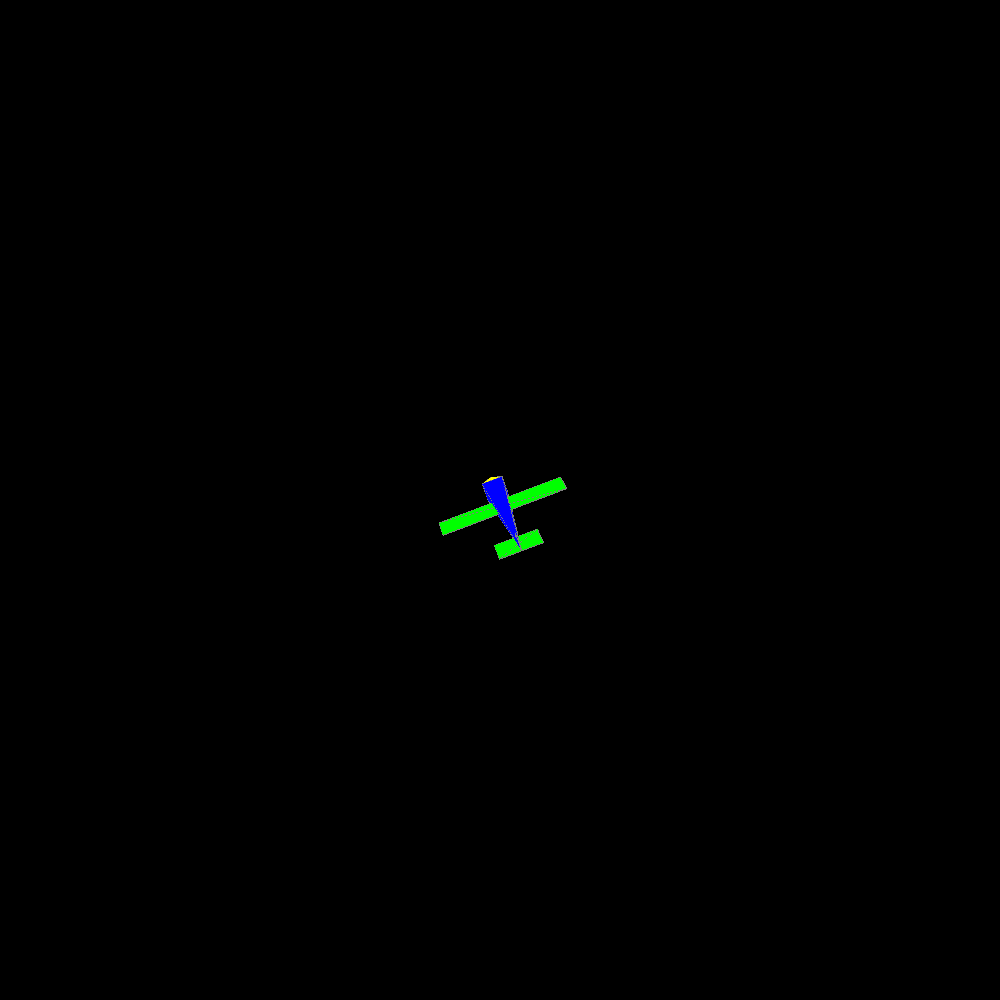

In [9]:
# Create the signal
course_command = Signals(dc_offset=70.0,
                        amplitude=10.0,
                        start_time=10.0,
                        frequency=0.1)

# Run the simulation
run_sim_and_display(course_command=course_command)

## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ book_assignments
```

Terminal output (should indicate no error):
```
Success: no issues found in 38 source files
```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
Your code has been rated at 10.00/10 (previous run: 9.99/10, +0.01)
```

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

In [1]:
from mav_sim.unit_tests.ch6_feedback_control_test import run_all_tests, PDControlWithRateTest, PIControlTest, TFControlTest, AutopilotTest
run_all_tests()


Starting PDControlWithRate test
Passed test on PDControlWithRate


Starting PIControlTest test
Passed test on PIControlTest


Starting TFControl test
Passed test on TFControl


Starting Autopilot test
Passed test on Autopilot

Starting pd_control_with_rate test
End of test

Starting pi_control test
End of test

Starting tf_control test
End of test

Starting autopilot test
End of test

